In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import pytesseract
import re
from deskew import determine_skew
import imutils
import numpy as np

In [2]:
pytorch_model_path = 'models/best.pt'
images_folder = 'photos/'
# pytesseract.pytesseract.tesseract_cmd = r'<full_path_to_your_tesseract_executable>'
# FOR WINDOWS ^

In [3]:
model = YOLO(pytorch_model_path)

In [4]:
def add_padding(img, box, padding=10):
    x1, y1, x2, y2 = box
    h, w = img.shape[:2]
    x1 = max(0, x1 - padding)
    y1 = max(0, y1 - padding)
    x2 = min(w, x2 + padding)
    y2 = min(h, y2 + padding)
    return x1, y1, x2, y2

In [5]:
def detect_number(img, result):
    img_ = img.copy()
    ret = []
    for i, box in enumerate(result[0].boxes.xyxy.tolist()):
        box = list(map(int, box))
        x1, y1, x2, y2 = add_padding(img, box)
        cropped = img[y1:y2, x1:x2]

        number = pytesseract.image_to_string(cropped, config='--psm 8 -c tessedit_char_whitelist=0123456789') # --psm 8 --oem 3 -c tessedit_char_whitelist=0123456789
        number = re.sub(r'\D', '', number)
        print(f'Box {i}: {number}')

        ret.append((number, box))

        cv2.rectangle(img_, (x1, y1), (x2, y2), (0, 255, 0), 2)
        margin = 20
        cv2.putText(img_, number, (x1 + margin, y1 + margin), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    plt.imshow(img_)
    plt.show()
    return ret
    

In [6]:
def deskew(image, angle):
    '''
    This function helps adjusts the image according to the determined skew angle as apart of the image pre-processing for optimal
    OCR results. 
    '''
    non_zero_pixels = cv2.findNonZero(cv2.bitwise_not(image))
    center, _, _ = cv2.minAreaRect(non_zero_pixels) # _, _ = wh, theta

    root_mat = cv2.getRotationMatrix2D(center, angle, 1)
    rows, cols = image.shape
    rotated = cv2.warpAffine(image, root_mat, (cols, rows), flags=cv2.INTER_CUBIC)

    return rotated


def crop_dark_regions(image):
    '''
    This function removes the border of the image. A dark border can skew characterizations. 
    '''
    mask = np.zeros(image.shape, dtype=np.uint8)

    cnts = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    cv2.fillPoly(mask, cnts, [255,255,255])
    mask = 255 - mask
    result = cv2.bitwise_or(image, mask)

    return result

def preprocess_cropped(cropped):
  img = imutils.resize(cropped, width=300) # type = np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  angle = determine_skew(img)
  img = deskew(img, angle)
  img = crop_dark_regions(img)
  img = cv2.bilateralFilter(img, 11, 17, 17)
  img = crop_dark_regions(img)
  img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  #img = img.filter(ImageFilter.GaussianBlur(radius=1))
  return img

def extract_number(img):
  number = pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')
  number = re.sub(r'\D', '', number)
  return number

/home/microgod/coding/machine_learning/ml_project/backend/.venv/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/331516529_5836498223135440_7204086185717752125_n.jpg: 640x448 1 number, 61.3ms
Speed: 1.9ms preprocess, 61.3ms inference, 571.7ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 1065


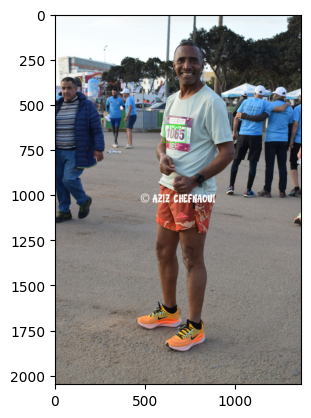

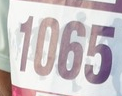

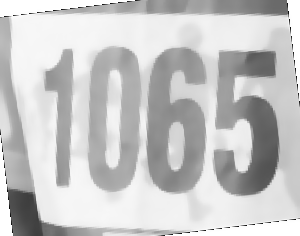

11065

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/331430244_611192140784640_3840601033506444658_n.jpg: 640x448 1 number, 54.3ms
Speed: 1.6ms preprocess, 54.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 535


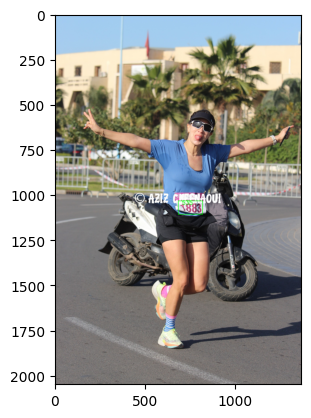

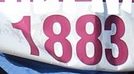

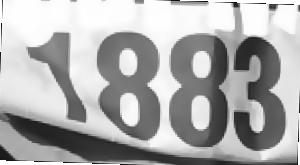

1883

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/331431102_615347800333085_2771519795600565388_n.jpg: 640x448 (no detections), 64.3ms
Speed: 1.8ms preprocess, 64.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)


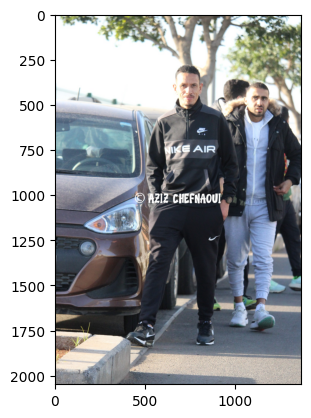


image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/330946831_1138871593450933_5955043051906495797_n.jpg: 640x448 1 number, 62.9ms
Speed: 1.6ms preprocess, 62.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 27


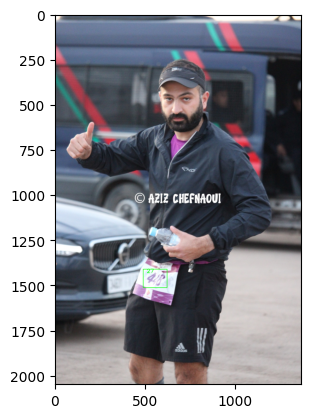

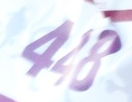

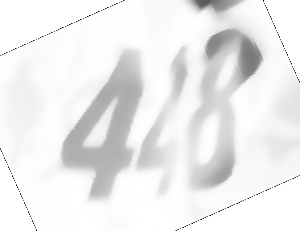

49

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/331727333_602057851410311_8519124805131639763_n.jpg: 448x640 5 numbers, 70.1ms
Speed: 1.6ms preprocess, 70.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Box 0: 586
Box 1: 955
Box 2: 77
Box 3: 97
Box 4: 5


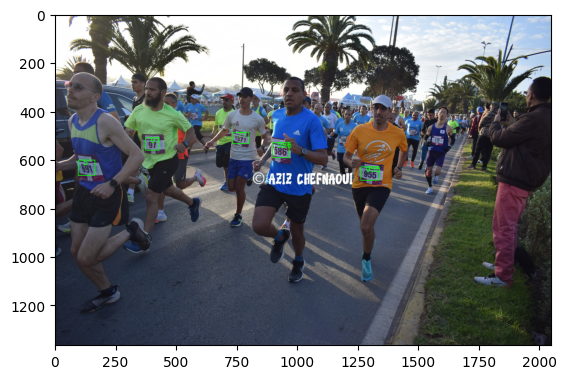

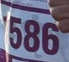

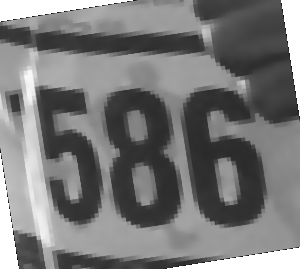

586


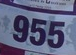

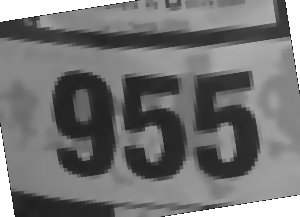

955


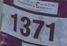

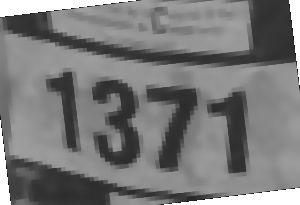

5


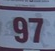

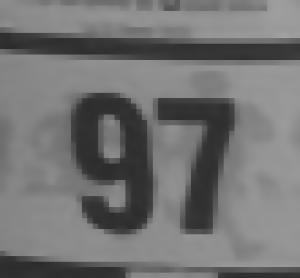

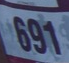

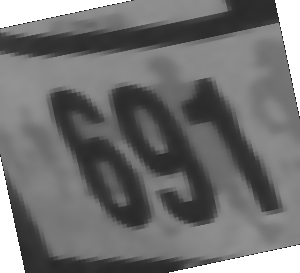

71

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/331428110_572606451475579_4313269979757001103_n.jpg: 640x448 1 number, 62.5ms
Speed: 1.9ms preprocess, 62.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 424


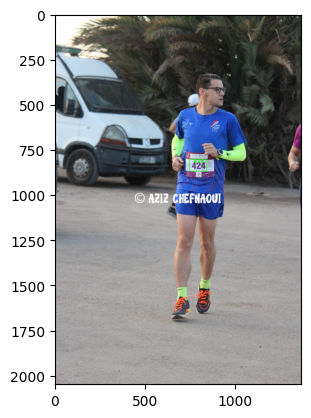

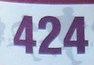

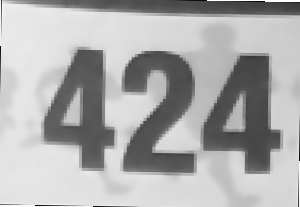

424

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/331516113_733036271544790_8363490365698453536_n.jpg: 640x448 1 number, 65.5ms
Speed: 1.9ms preprocess, 65.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 3299


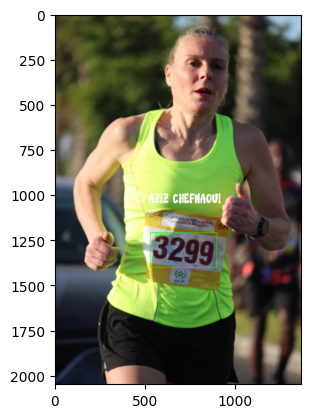

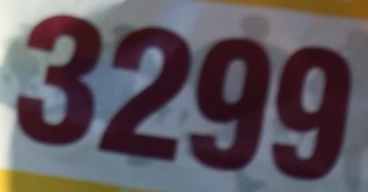

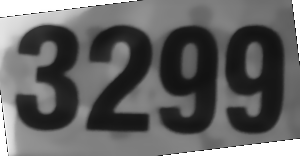

3299

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/331647770_875084587101033_8280757321333045211_n.jpg: 448x640 3 numbers, 68.3ms
Speed: 1.9ms preprocess, 68.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Box 0: 1202
Box 1: 49
Box 2: 52


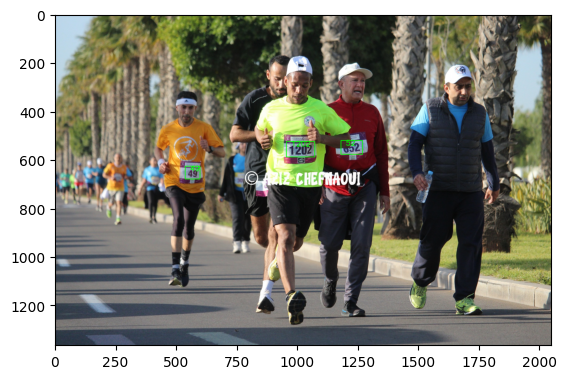

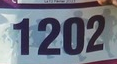

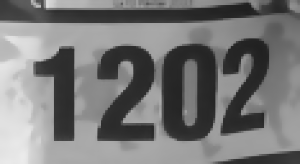

1202


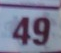

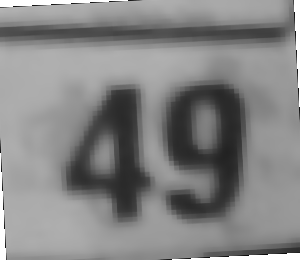

49


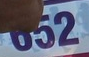

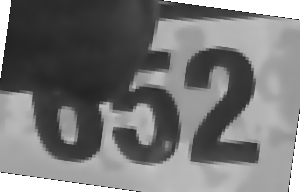

52

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/331513333_909601196738523_5801708559721256524_n.jpg: 640x448 1 number, 63.9ms
Speed: 1.8ms preprocess, 63.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 3594


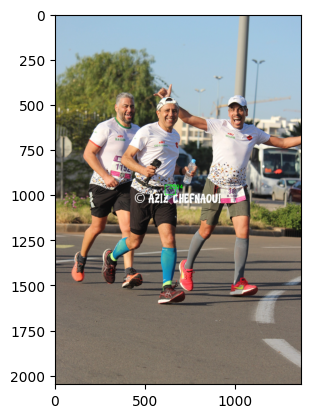

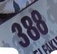

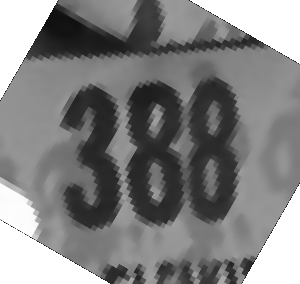

30

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/330967885_3479332949052000_8219602215507783060_n.jpg: 640x448 1 number, 66.8ms
Speed: 2.2ms preprocess, 66.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 203


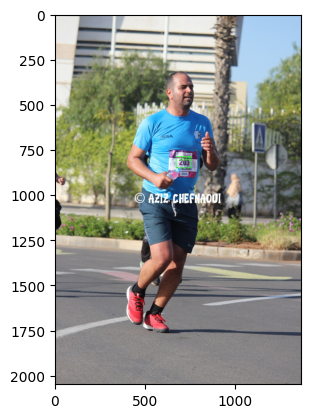

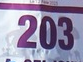

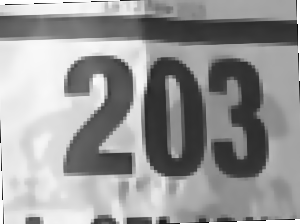

208

image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/330991876_559403296251100_474177718744273108_n.jpg: 640x448 1 number, 65.8ms
Speed: 2.1ms preprocess, 65.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 5


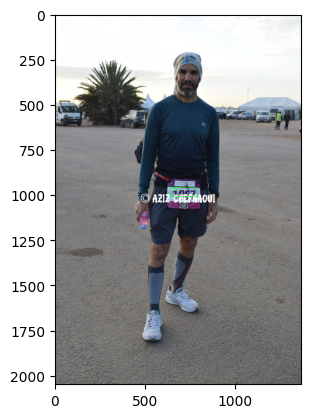

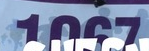

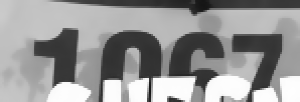

1


In [7]:
import os
images = os.listdir(images_folder)
for i, image in enumerate(images[30:]):
    img = cv2.imread(images_folder + image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = model.predict(images_folder + image)
    boxes = detect_number(img, result)
    for box in boxes:
      box_ = add_padding(img, box[1])
      cropped = img[box_[1]:box_[3], box_[0]:box_[2]]
      pre_cropped = preprocess_cropped(cropped)
      number = extract_number(pre_cropped)
      cropped = Image.fromarray(cropped)
      display(cropped)
      display(pre_cropped)
      print(number)
    if i == 10:
        break

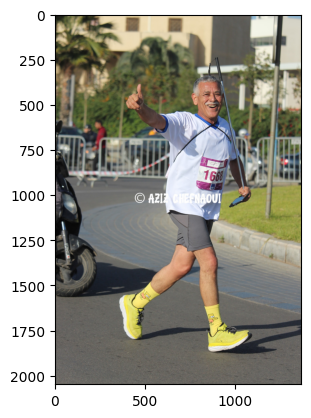

In [8]:
test_path = images_folder + '330960198_765459574924564_2317964029640888711_n.jpg'
img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# plt.show()


image 1/1 /home/microgod/coding/machine_learning/ml_project/backend/photos/330960198_765459574924564_2317964029640888711_n.jpg: 640x448 1 number, 57.0ms
Speed: 1.6ms preprocess, 57.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 1648


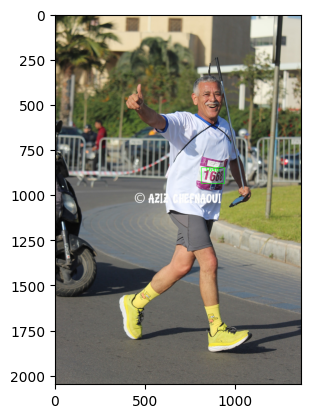

In [9]:
test_path = images_folder + '330960198_765459574924564_2317964029640888711_n.jpg'
img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# plt.show()
result = model.predict(test_path)
boxes = detect_number(img, result)
box = boxes[0]
box_ = add_padding(img, box[1])
img = img[box_[1]:box_[3], box_[0]:box_[2]]
# cropped = Image.fromarray(cropped)
# display(cropped)
# print(box[0])

'1648\n'

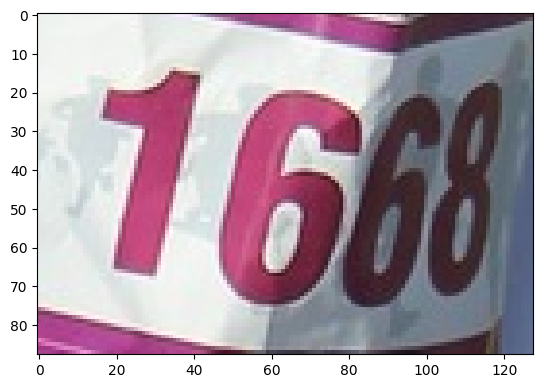

In [10]:
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

'1648\n'

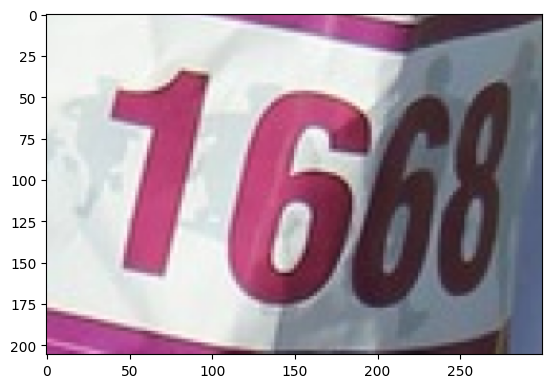

In [11]:
img = imutils.resize(img, width=300)
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

'1648\n'

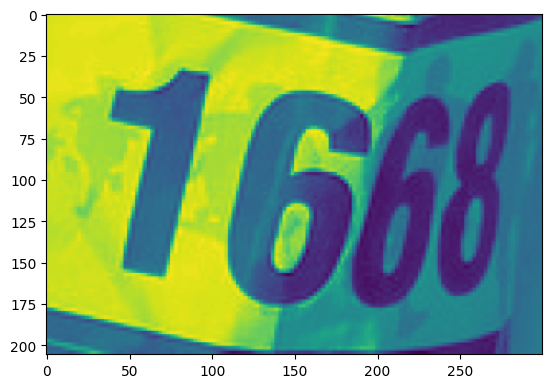

In [12]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

In [13]:
angle = determine_skew(img)
angle

13.000000000000005

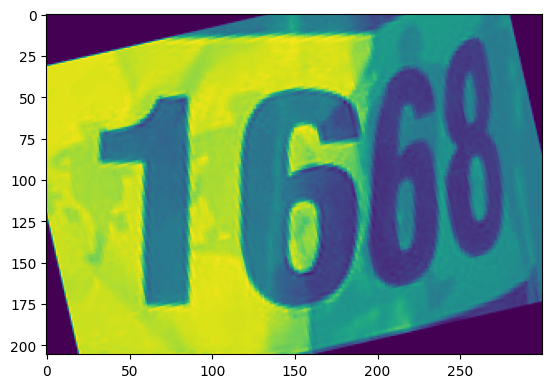

In [14]:
img = deskew(img, angle)
plt.imshow(img)

In [15]:
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

'1668\n'

'1668\n'

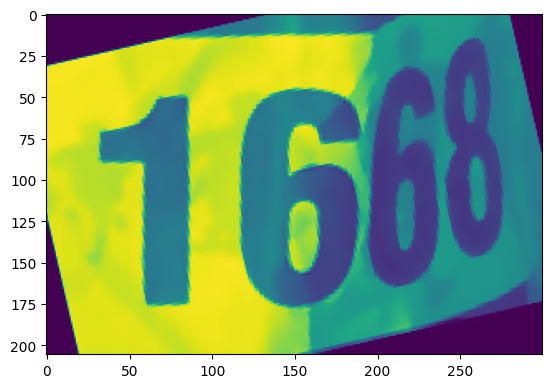

In [16]:
img = cv2.bilateralFilter(img, 11, 17, 17)
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

'1668\n'

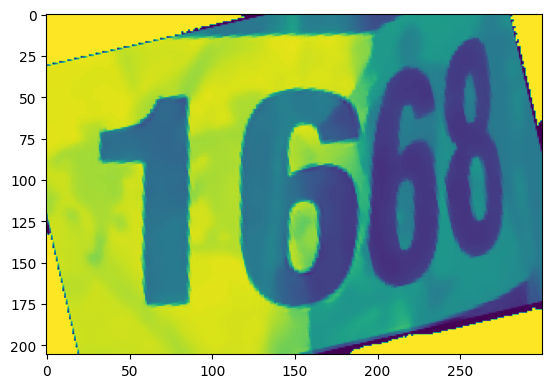

In [17]:
img = crop_dark_regions(img)
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

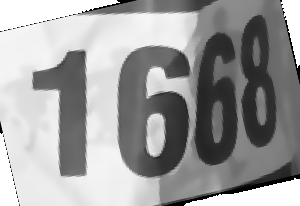

'1668\n'

In [18]:
img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
display(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

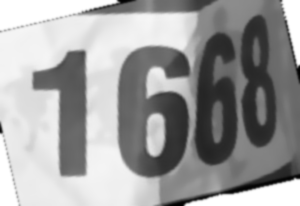

'1668\n'

In [19]:
img = img.filter(ImageFilter.GaussianBlur(radius=1))
display(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

In [20]:
# brightness = ImageEnhance.Brightness(img)
# img = brightness.enhance(1.5)
# display(img)
# pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

In [21]:
# contrast = ImageEnhance.Contrast(img)
# img = contrast.enhance(2.0)
# display(img)
# pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

In [22]:
nums = pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')
nums

'1668\n'